In [0]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation

In [0]:


np.random.seed(1671) #for reproducibility

In [0]:
#network and training
NB_EPOCH=250
BATCH_SIZE=128
VERBOSE=1
NB_CLASSES=10 #number of outputs=number of digits
OPTIMIZER=SGD() 
N_HIDDEN=130
VALIDATION_SPLIT=0.2 #how much TRAIN is reserved for validation
#10 outputs
#final stage is softmax
RESHAPED=784
N_HIDDEN=128
DROPOUT=0.3


In [0]:
def create_model():
  model=Sequential()
  model.add(Dense(N_HIDDEN,input_shape=(RESHAPED,)))
  model.add(Activation('relu'))
  model.add(Dropout(DROPOUT))
  model.add(Dense(N_HIDDEN))
  model.add(Activation('relu'))
  model.add(Dropout(DROPOUT))
  model.add(Dense(NB_CLASSES))
  model.add(Activation('softmax'))
  model.summary()
  
  return model
  
  
  

In [0]:
#data is shuffled and split between train and test sets
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [0]:
print("Shape of X_train"+str(X_train.shape))
print("Shape of y_train"+str(y_train.shape))
print("Shape of X_test"+str(X_test.shape))
print("Shape of y_test"+str(y_test.shape))

Shape of X_train(60000, 28, 28)
Shape of y_train(60000,)
Shape of X_test(10000, 28, 28)
Shape of y_test(10000,)


In [0]:
#X_train is 60000 rows of 28*28 values--> rshaped in 60000*784
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [0]:
#normalize fixel with in 0/1 so divide by 255 and 10 classes each digit for one digit
X_train/=255
X_test/=255
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

60000 train samples
10000 test samples


In [0]:
#convert class vectors to binary class matrics
y_train=np_utils.to_categorical(y_train,NB_CLASSES)
y_test=np_utils.to_categorical(y_test,NB_CLASSES)

In [0]:
model1=create_model()
model1.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
__________

In [0]:
history=model1.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/250
48000/48000 [==============================] - 2s 52us/step - loss: 1.7404 - acc: 0.4539 - val_loss: 0.9293 - val_acc: 0.8125
Epoch 2/250
48000/48000 [==============================] - 2s 42us/step - loss: 0.9232 - acc: 0.7231 - val_loss: 0.5400 - val_acc: 0.8652
Epoch 3/250
48000/48000 [==============================] - 2s 42us/step - loss: 0.6935 - acc: 0.7880 - val_loss: 0.4297 - val_acc: 0.8884
Epoch 4/250
48000/48000 [==============================] - 2s 42us/step - loss: 0.5947 - acc: 0.8210 - val_loss: 0.3789 - val_acc: 0.8977
Epoch 5/250
48000/48000 [==============================] - 2s 42us/step - loss: 0.5347 - acc: 0.8394 - val_loss: 0.3455 - val_acc: 0.9041
Epoch 6/250
48000/48000 [==============================] - 2s 42us/step - loss: 0.4976 - acc: 0.8524 - val_loss: 0.3232 - val_acc: 0.9107
Epoch 7/250
48000/48000 [==============================] - 2s 43us/step - loss: 0.4616 - acc: 0.8627 - val_loss: 0.3048 - 

In [0]:
score=model1.evaluate(X_test,y_test,verbose=1)
print("\nTest score:",score[0])
print("\nTest accuracy:",score[1])

10000/10000 [==============================] - 1s 81us/step

Test score: 0.07749762526372214

Test accuracy: 0.9779


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


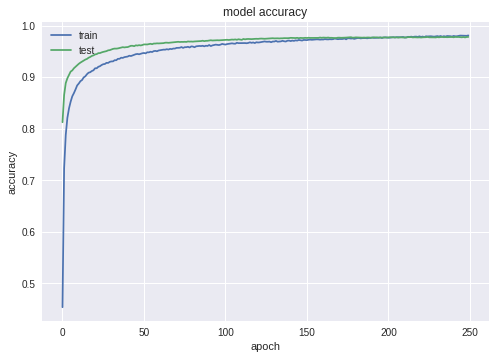

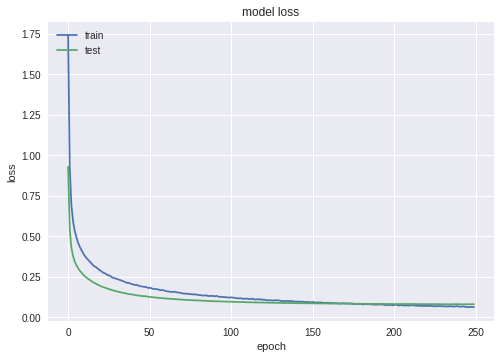

In [0]:
import matplotlib.pyplot as plt
#list all data in history
print(history.history.keys())
#summarizez history for accuracy

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('apoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()